In [3]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

%run /gfs/devel/ddanko/notebook-init.py

# load R libraries                                                                                    
%R invisible(library(ggplot2))
%R invisible(library(fastcluster))
%R invisible(library(reshape))
%R invisible(library(reshape2))
%R invisible(library(gplots))
%R invisible(library(RSQLite))

#set up ggplot2 defaults                                                                              
%R theme_set(theme_gray(base_size=18))

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Populating the interactive namespace from numpy and matplotlib


[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/kraken.dir/species.kraken.aggregated.counts.tsv.gz"
 [1] human.anterior_nares   human.anterior_nares   human.anterior_nares  
 [4] human.anterior_nares   human.anterior_nares   human.anterior_nares  
 [7] human.anterior_nares   human.anterior_nares   human.anterior_nares  
[10] human.anterior_nares   human.posterior_fornix human.posterior_fornix
[13] human.posterior_fornix human.posterior_fornix human.posterior_fornix
[16] human.posterior_fornix human.posterior_fornix human.posterior_fornix
[19] human.posterior_fornix human.posterior_fornix human.stool           
[22] human.stool            human.stool            human.stool           
[25] human.stool            human.stool            human.stool           
[28] human.stool            human.stool            human.stool           
[31] human.throat           human.throat           human.throat          
[34] human.throat           human.throat           human.thr

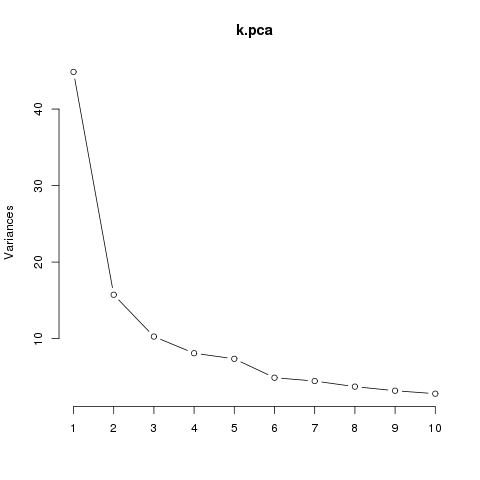

In [30]:
%%R

##########################################################
##########################################################
#
# KRAKEN
#
##########################################################
##########################################################


tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/kraken.dir/species.kraken.aggregated.counts.tsv.gz')
print(tableNames)

k.classes <- c()
kraken <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){strsplit(n,'\\.R')[[1]][1]})
    
    tbl[is.na(tbl)] <- 0
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    #tbl <- tbl[apply(tbl, 1, function(row) any(row !=0 )),]

    k.classes <- c(k.classes,  unlist(classesInTbl))
    kraken <- merge(kraken,tbl,by="row.names",all=T)
    kraken[is.na(kraken)] <- 0 
    rownames(kraken) <- kraken[,1]
    kraken <- kraken[,-1]
}
k.classes <- as.factor(k.classes)
print(k.classes)
print(kraken[1:5,1:4])
kraken <- kraken[apply(kraken, 1, function(row) any(row !=0 )),]
    
k.pca <- prcomp(t(kraken),center=T,scale=T)
plot(k.pca,type='l')
    


In [19]:
%%R

##########################################################
##########################################################
#
# AC-DIAMOND
#
##########################################################
##########################################################

tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/*dmnd.dir/species.*dmnd.aggregated.counts.tsv.gz')
print(tableNames)

ad.classes <- c()
acdmnd <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){strsplit(n,'\\.R')[[1]][1]})

    tbl[is.na(tbl)] <- 0
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    #tbl <- tbl[apply(tbl, 1, function(row) all(row !=0 )),]
        
    ad.classes <- c(ad.classes,  unlist(classesInTbl))
        
    acdmnd <- merge(acdmnd,tbl,by="row.names",all=T)
    acdmnd[is.na(acdmnd)] <- 0 

    rownames(acdmnd) <- acdmnd[,1]
    acdmnd <- acdmnd[,-1]
}
ad.classes <- factor(ad.classes)
print(ad.classes)

print(length(ad.classes))
print(dim(acdmnd))
print(acdmnd[1:5,1:4])
                     
ad.pca <- prcomp(t(acdmnd),center=T,scale=T)
plot(ad.pca,type='l')


character(0)
factor(0)
Levels: 
[1] 0
[1] 0 0
Error in acdmnd[1:5, 1:4] : subscript out of bounds


In [18]:
%%R

##########################################################
##########################################################
#
# AC-DIAMOND FAST
#
##########################################################
##########################################################

tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/*dmndfast.dir/species.*dmndfast.aggregated.counts.tsv.gz')
print(tableNames)

adf.classes <- c()
acdmndfast <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){strsplit(n,'\\.R')[[1]][1]})

    tbl[is.na(tbl)] <- 0
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    #tbl <- tbl[apply(tbl, 1, function(row) all(row !=0 )),]

    adf.classes <- c(adf.classes,  unlist(classesInTbl))
    acdmndfast <- merge(acdmndfast,tbl,by="row.names",all=T)
    acdmndfast[is.na(acdmndfast)] <- 0 

    rownames(acdmndfast) <- acdmndfast[,1]
    acdmndfast <- acdmndfast[,-1]
}
adf.classes <- factor(adf.classes)
print(adf.classes)

print(length(adf.classes))
print(dim(acdmndfast))
print(acdmndfast[1:5,1:4])
                     

adf.pca <- prcomp(t(acdmndfast),center=T,scale=T)
plot(adf.pca,type='l')                    


character(0)
factor(0)
Levels: 
[1] 0
[1] 0 0
Error in acdmndfast[1:5, 1:4] : subscript out of bounds


[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human_qin/acdmndfast.dir/species.acdmndfast.aggregated.counts.tsv.gz"
 [1] human_qin.UC      human_qin.UC      human_qin.UC      human_qin.HEALTHY
 [5] human_qin.CD      human_qin.CD      human_qin.HEALTHY human_qin.CD     
 [9] human_qin.CD      human_qin.UC      human_qin.HEALTHY human_qin.CD     
[13] human_qin.HEALTHY human_qin.CD      human_qin.UC      human_qin.UC     
[17] human_qin.HEALTHY human_qin.HEALTHY
Levels: human_qin.CD human_qin.HEALTHY human_qin.UC
[1] 18
[1] 1644   18
                                 human_qin.UC.R11_count human_qin.UC.R23_count
Acanthamoeba_polyphaga_mimivirus               0.000000               4.579767
Acaryochloris_marina                           0.000000               4.579767
Acetivibrio_cellulolyticus                     8.932449               8.579767
Acetobacterium_woodii                          9.517412               9.164729
Acetobacter_pasteurianus                     

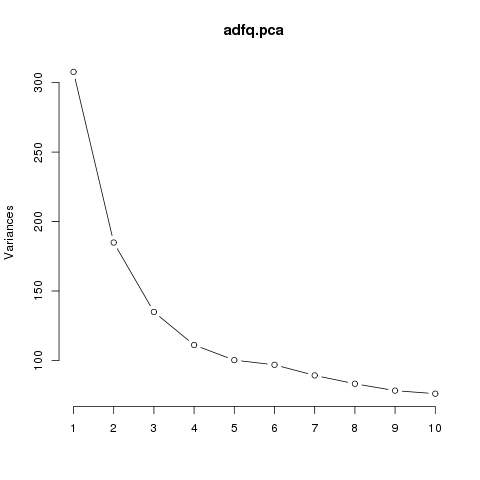

In [124]:
%%R

##########################################################
##########################################################
#
# AC-DIAMOND FAST Qin et al
#
##########################################################
##########################################################

tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human_qin/*dmndfast.dir/species.*dmndfast.aggregated.counts.tsv.gz')
print(tableNames)

adfq.classes <- c()
acdmndfastq <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){strsplit(n,'\\.R')[[1]][1]})

    tbl[is.na(tbl)] <- 0
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    #tbl <- tbl[apply(tbl, 1, function(row) all(row !=0 )),]

    adfq.classes <- c(adfq.classes,  unlist(classesInTbl))
    acdmndfastq <- merge(acdmndfastq,tbl,by="row.names",all=T)
    acdmndfastq[is.na(acdmndfastq)] <- 0 

    rownames(acdmndfastq) <- acdmndfastq[,1]
    acdmndfastq <- acdmndfastq[,-1]
}
adfq.classes <- factor(adfq.classes)
print(adfq.classes)

print(length(adfq.classes))
print(dim(acdmndfastq))
print(acdmndfastq[1:5,1:4])
                     

adfq.pca <- prcomp(t(acdmndfastq),center=T,scale=T)
plot(adfq.pca,type='l')                    


[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/human-anterior_nares-R011132.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/human-anterior_nares-R012663.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/human-anterior_nares-R014464.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/human-anterior_nares-R014901.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/human-anterior_nares-R015996.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/human-anterior_nares-R018981.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/human-anterior_nares-R022129.mp2prof.tsv"
[1] "/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan

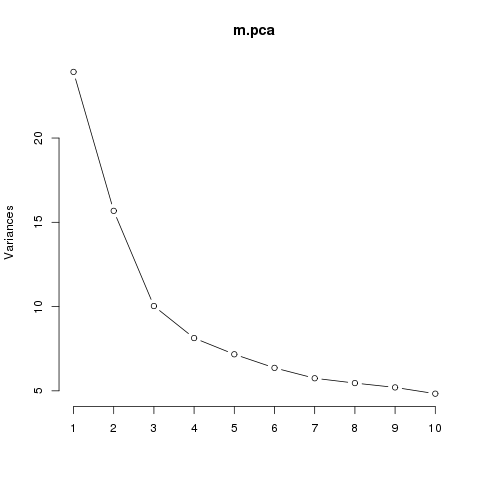

In [117]:
%%R

##########################################################
##########################################################
#
# METAPHLAN2
#
##########################################################
##########################################################

tableNames <- Sys.glob('/gfs/work/ddanko/taxonomic_profiler_comparison/analysis/actual/human/metaphlan2.dir/*.mp2prof.tsv')

m.classes <- c()
mphlan <- matrix(0,0,0)
for (tblName in tableNames){
    print(tblName)
    tbl <- read.table(tblName,blank.lines.skip=T,sep="\t",row.names=1)
    class <- tail(strsplit(strsplit(tblName,'-R')[[1]][1],'/')[[1]],1)
    sample <- tail(strsplit(strsplit(tblName,'\\.mp2')[[1]][1],'/')[[1]],1)
    genera <- rownames(tbl)[grep('g__',rownames(tbl))]
    genera <- genera[grep('s__',genera,invert=T)]
    tbl <-tbl[rownames(tbl) %in% genera,,drop=F]
    m.classes <- c(m.classes,class)
    newcolnames <- c(colnames(mphlan),sample)
    mphlan <- merge(mphlan,tbl,by="row.names",all=T)
    mphlan[is.na(mphlan)] <- 0
    rownames(mphlan) <- mphlan[,1]
    mphlan <- mphlan[,-1,drop=F]
    colnames(mphlan) <- newcolnames
}
#m.classes <- factor(m.classes)
print(m.classes)
print(mphlan[1:5,1:4])

m.pca <- prcomp(t(mphlan),center=T,scale=T)
plot(m.pca,type='l')





In [93]:
%%R
library(ggplot2)

#pairs(adf.pca$x[,1:6],pch=21,bg=rainbow(length(unique(adf.classes)))[unclass(adf.classes)])
pairs(adf.pca$x[,1:6],pch=21,col=adf.classes)



Error in pairs(adf.pca$x[, 1:6], pch = 21, col = adf.classes) : 
  object 'adf.pca' not found


In [94]:
%%R

##########################################################
##########################################################
#
# PCA Plots
#
##########################################################
##########################################################

library(ggplot2)
library(gridExtra)
library(factoextra)

plotPCA <- function(comps, pca, classes){
    
    df <- data.frame(pca$x)
    df[,"class"] <- classes 
    combs <- combn(comps,2,simplify=F)

    for (comb in combs){

        p <- fviz_pca_ind(pca, axes=comb, geom = "point",
                    habillage=classes, addEllipses=TRUE,
                    ellipse.level= 0.95)+ theme_minimal()
                print(p) 
    }
}


In [95]:
%%R

plotPCA(1:3, adf.pca, adf.classes)


Error in data.frame(pca$x) : object 'adf.pca' not found


In [96]:
%%R

plotPCA(1:3, ad.pca, ad.classes)


Error in data.frame(pca$x) : object 'ad.pca' not found


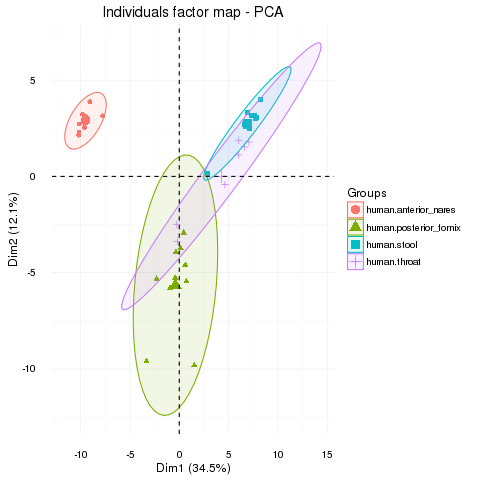

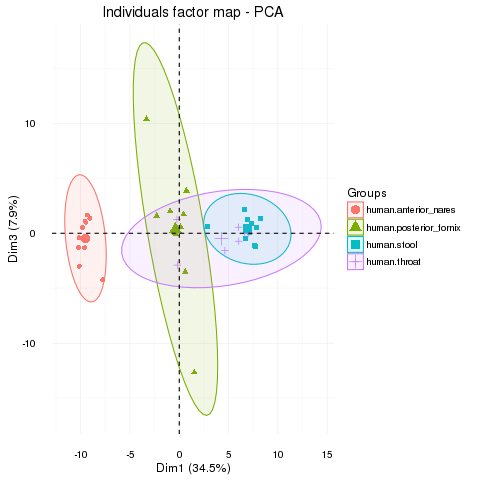

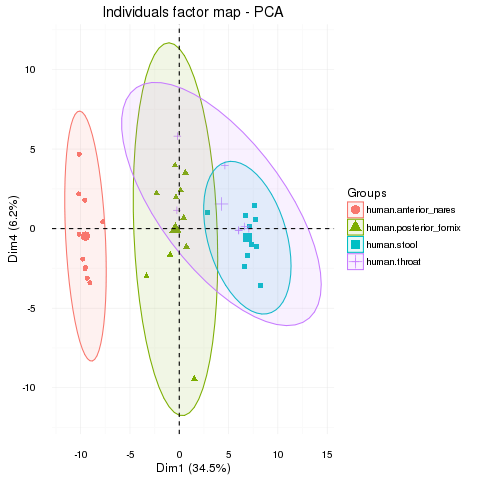

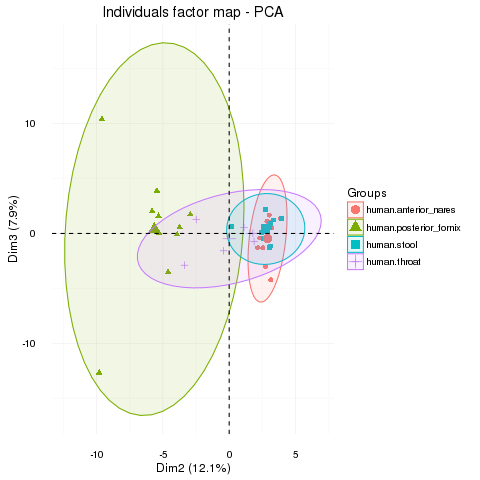

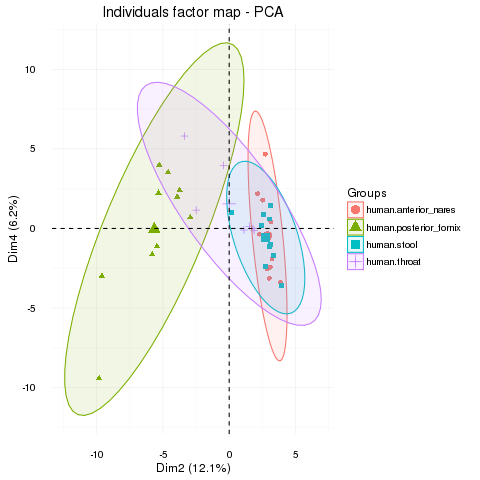

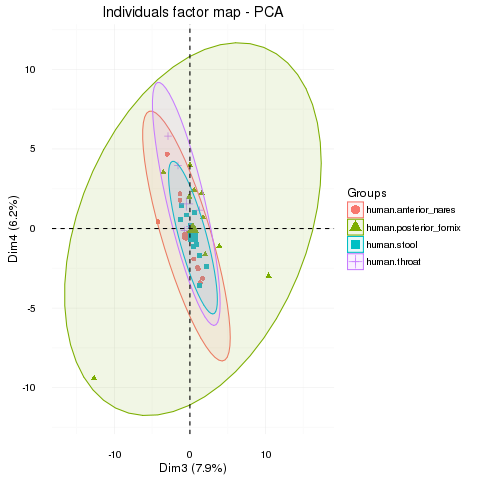

In [97]:
%%R
plotPCA(1:4, k.pca, k.classes)

In [98]:
%%R

library(fastICA)
k.ica <- fastICA(t(kraken),5)

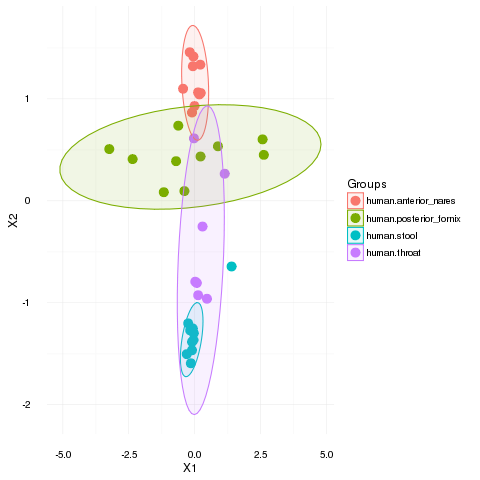

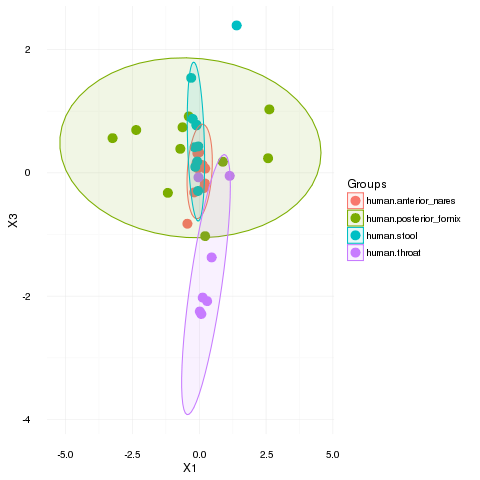

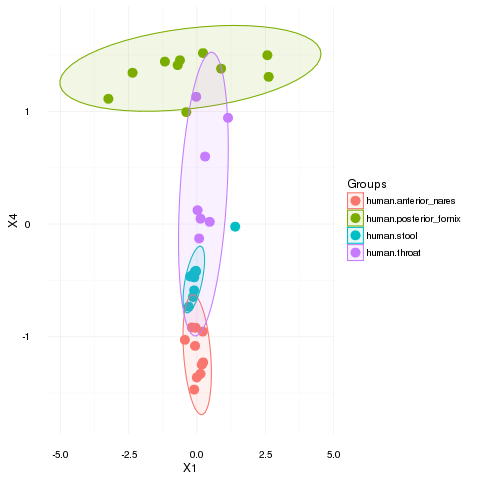

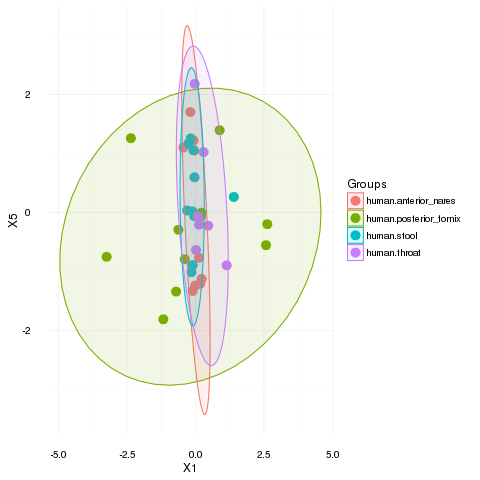

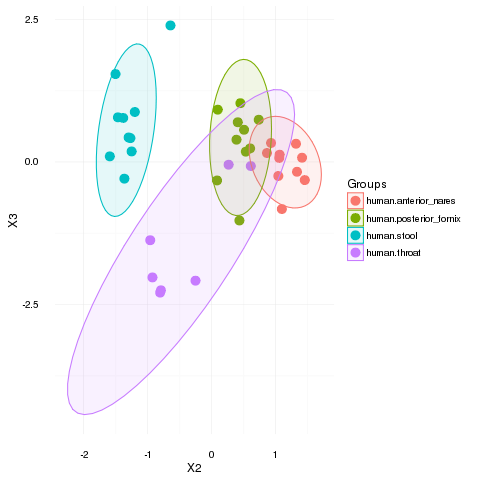

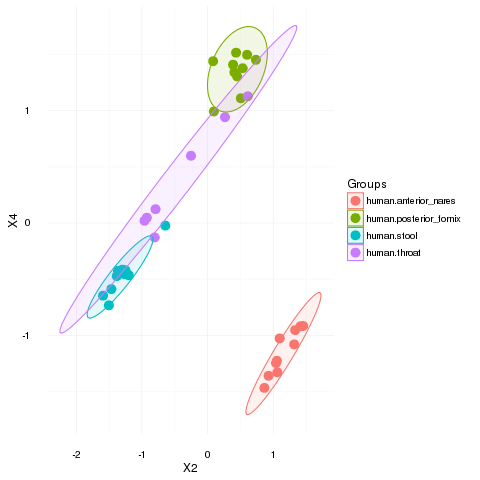

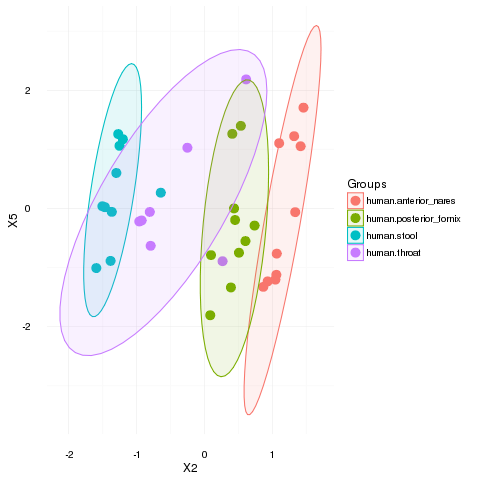

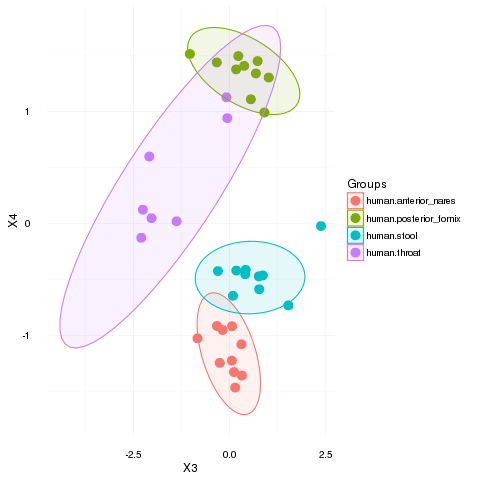

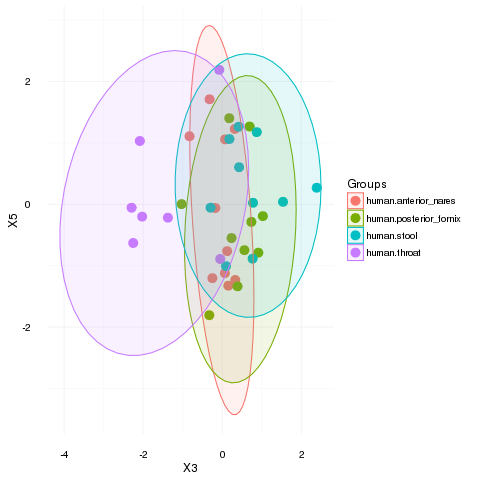

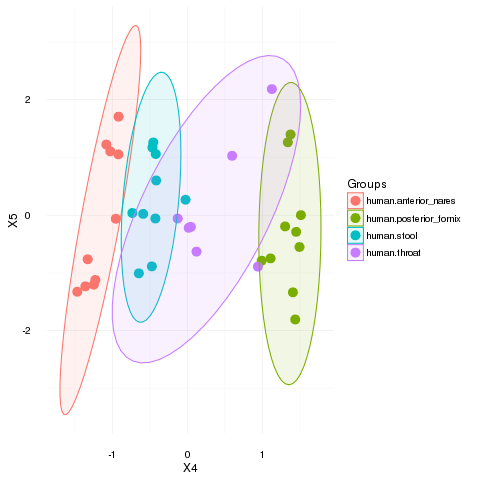

In [116]:
%%R

##########################################################
##########################################################
#
# ICA Plots
#
##########################################################
##########################################################

library(ggplot2)
library(gridExtra)
library(factoextra)

plotICA <- function(ica, classes){
    
    df <- data.frame(ica$S)
    df['Groups'] = classes
    combs <- combn(1:dim(ica$S)[2],2,simplify=F)
    for (comb in combs){
        X = colnames(df)[comb[1]]
        Y = colnames(df)[comb[2]]
        p <- ggplot(df,aes_string(x=X,y=Y, color="Groups")) +
                geom_point(size=4) +
                stat_ellipse(geom = "polygon", alpha = 1/10,aes_string(fill="Groups")) +
                theme_minimal()
        print(p)
    }
}



plotICA(k.ica,k.classes)


#         p <- fviz_pca_ind(foo, axes=c(1,2), geom = "point",
#                     habillage=k.classes, addEllipses=TRUE,
#                     ellipse.level= 0.95)+ theme_minimal()
#                 print(p) 
#plotPCA(1:4, k.ica, k.classes)

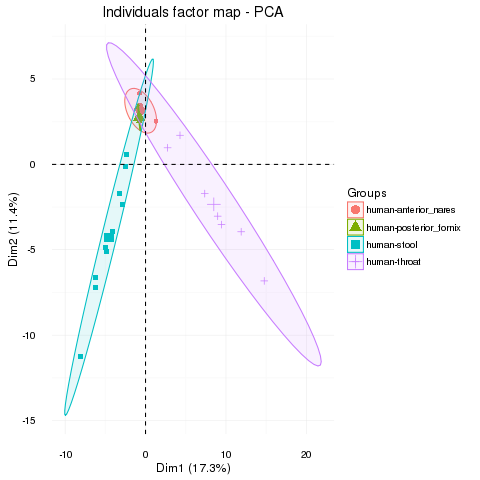

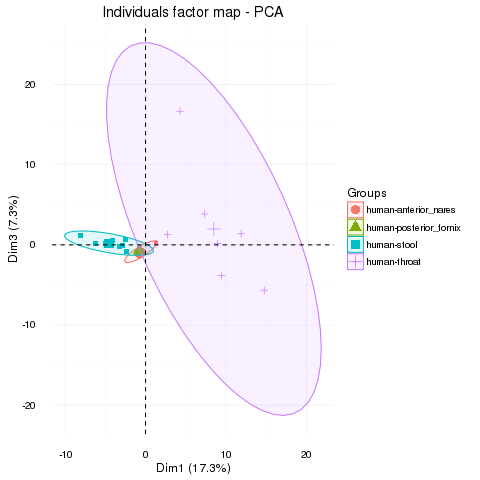

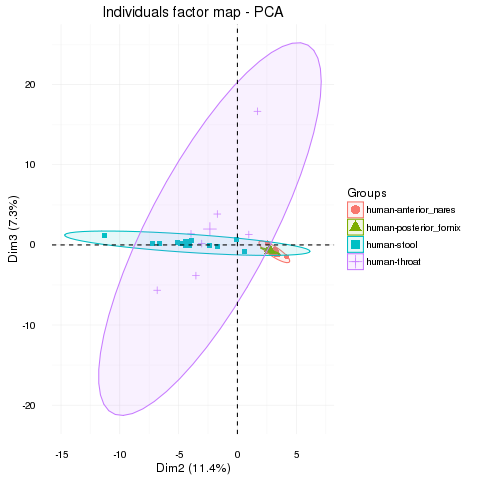

In [118]:
%%R
plotPCA(1:3, m.pca, m.classes)

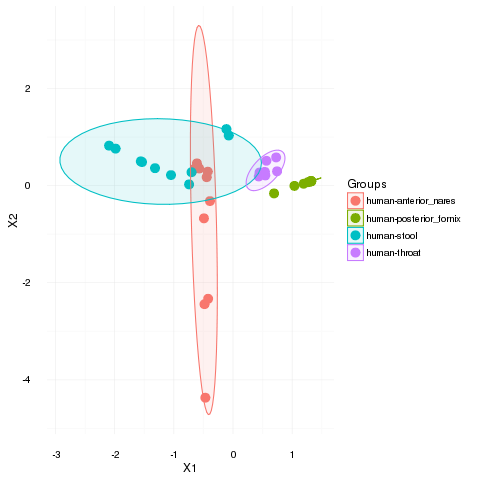

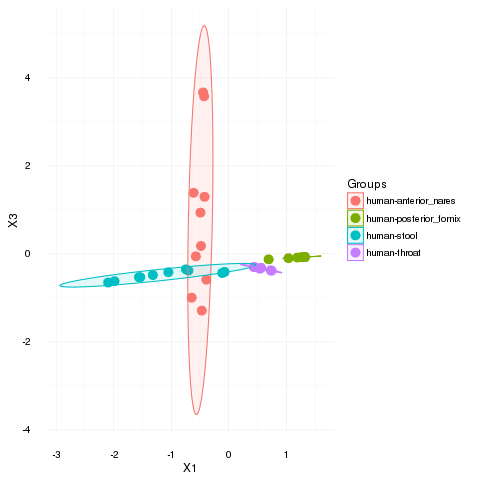

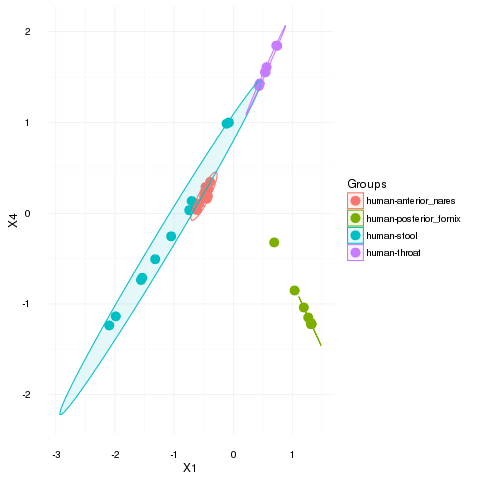

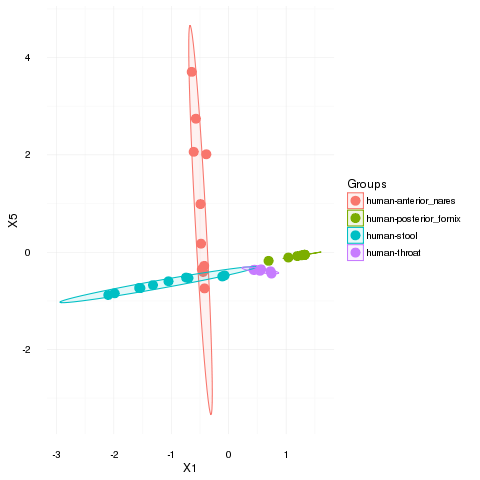

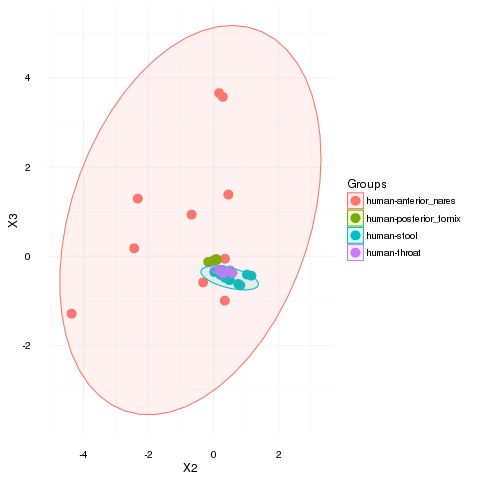

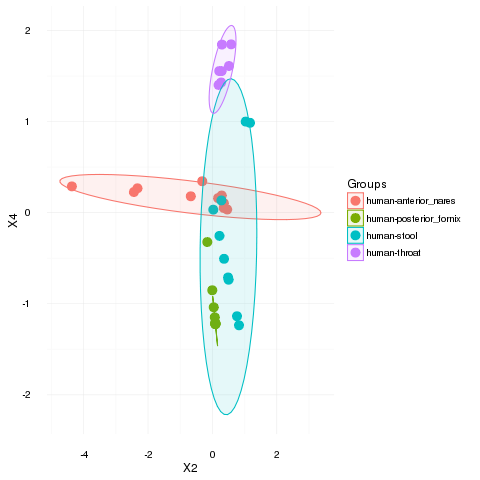

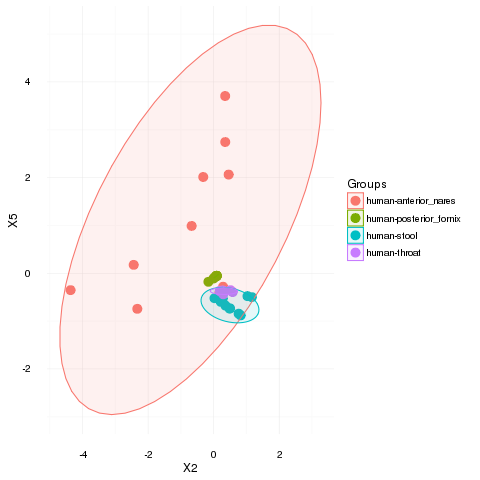

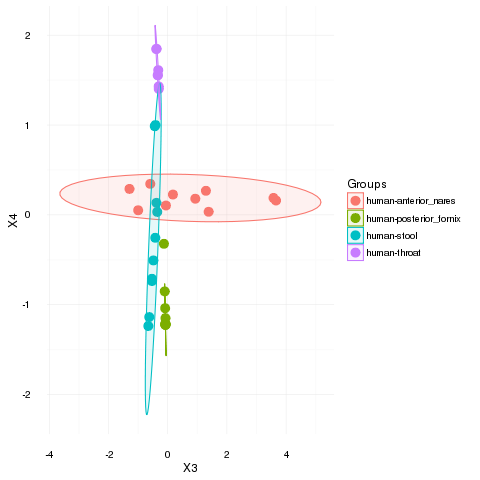

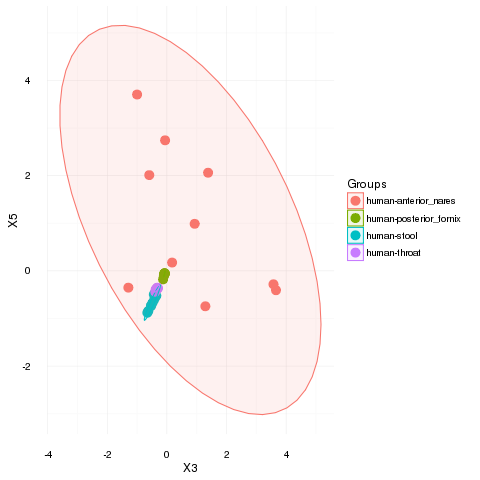

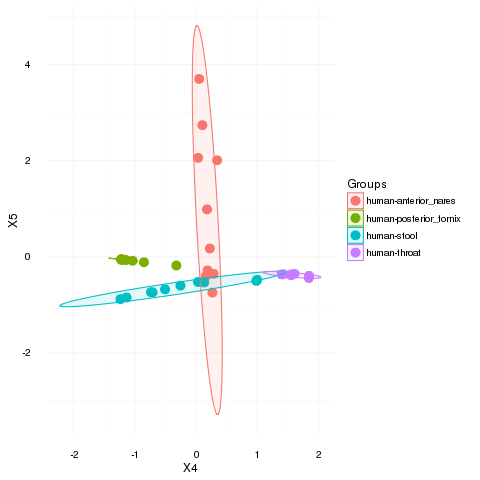

In [119]:
%%R

library(fastICA)
m.ica <- fastICA(t(mphlan),5)
plotICA(m.ica,m.classes)

In [120]:
%%R


make_jsd_matrix <- function(n){
    pseudocount <- 0.00000001

    m <- matrix(nrow=ncol(n),ncol=ncol(n))

    for (i in 1:ncol(n)){
        for (j in 1:ncol(n)){
            m[i,j] <- jsd(n[,i],n[,j])
        }
     }
    colnames(m) <- colnames(n)
     rownames(m) <- colnames(n)
     return(m)
}

jsd <- function(a,b){
    anorm <- a/sum(a)
    bnorm <- b/sum(b)
     m <- (anorm+bnorm)/2
     div <- kld(anorm,m)/2 + kld(bnorm,m)/2
     dist <- sqrt(div)
     return(dist) 
}

kld <- function(a,b){
     l <- log(a/b, 2)
     l[is.na(l)] <- 0
     l[is.infinite(l)] <- 0

    return( sum( a * l))
}

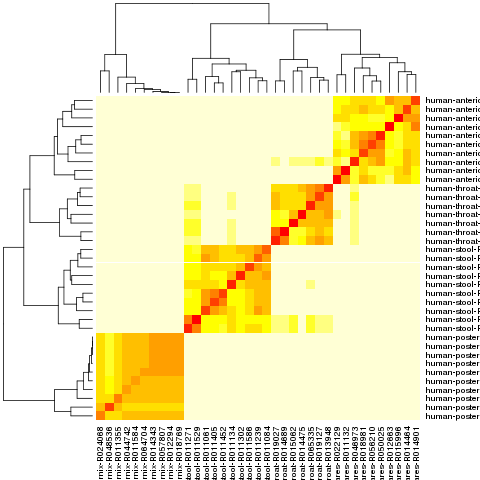

In [122]:
%%R

m.jdm <- make_jsd_matrix(mphlan)
heatmap(m.jdm)

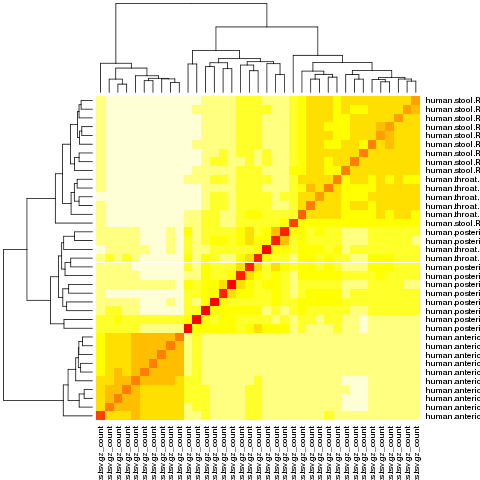

In [132]:
%%R

k.jdm <- make_jsd_matrix(kraken)
heatmap(k.jdm)

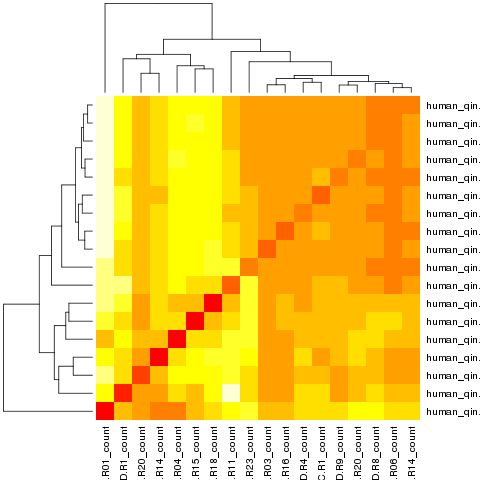

In [130]:
%%R

adfq.jdm <- make_jsd_matrix(acdmndfastq)

heatmap(adfq.jdm)